### Simulation model

Take true model

$$y_i=\beta x_i$$

$\vec{X} is a sample of observed variables and \vec{Y} is a response variable to that sample.

We want to compare two models:

$$y_i=\beta_0 + \beta_1 x_i + \epsilon_i$$

and

$$y_i=\beta x_i + \epsilon_i$$

We assume that $$y_i \sim \mathcal{N}(\beta_0+\beta_1 x_i, \sigma ^2)$$


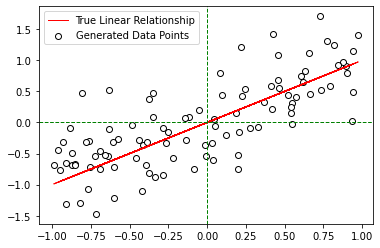

In [132]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

num_samples = 100  # number of sample points

#X = np.linspace(0, 1, num_samples) * 2 - 1
X = np.random.rand(num_samples) * 2 - 1

beta =  1 # true slope
beta_0 = 0.05
noise = np.random.normal(0, 0.5, num_samples)  # standard normal noise term

y = beta * X + noise + beta_0


plt.plot(
    X, beta * X, color='red', linewidth=1, label='True Linear Relationship'
    )
plt.scatter(
    X, y, color='white', edgecolor='black', marker='o', label='Generated Data Points'
    )
plt.legend()

plt.axhline(0, color='green', linewidth=1, linestyle='--')
plt.axvline(0, color='green', linewidth=1, linestyle='--')

plt.title('')
plt.show()

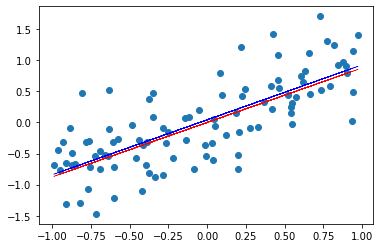

In [133]:
from sklearn.linear_model import LinearRegression
from linear_regression import linear_regression


X = X.reshape(-1, 1)  # values converts it into a numpy array
y = y.reshape(-1, 1)

Y_pred = linear_regression(X, y)

Y_pred_no = linear_regression(X, y, intercept=False)


plt.scatter(X, y)
plt.plot(X, Y_pred, color='blue', linewidth=0.5)
plt.plot(X, Y_pred_no, color='red', linewidth=0.5)
plt.show()

We wish to compare Akaike Information Criterion of two models to check goodness of fit. 

The formula is

$$
BIC=n \log(2 \pi \sigma^2)+ \frac{\sum (y_i-\hat{y})^2}{\sigma^2}+2\log n
$$

In [134]:
from linear_regression import bayesian_information_criterion
AIC_no = num_samples * np.log(2 * np.pi)+2 + np.sum((y+Y_pred_no)**2)+2*np.log(num_samples)
AIC = num_samples * np.log(2 * np.pi)+2 + np.sum((y+Y_pred)**2)+2*np.log(num_samples)

BIC = bayesian_information_criterion(y, Y_pred, num_samples, 1, 3)
BIC_no = bayesian_information_criterion(y, Y_pred_no, num_samples, 1, 2)

print(BIC)
print(BIC_no)

print(AIC_no)
print(AIC)

457.6345669168381
451.95123880008833
324.4746429064996
325.01372187188036


We will compare two regression models:

One is with intercept term and the other one is a no-intercept

$$
\hat{\beta_1} = \frac{S_{xy}}{S_{xx}}
$$

$$
S_{xy} = \sum (x_i- \bar{x})y_i
$$

$$
S_{xx} = \sum (x_i- \bar{x})^2
$$

$$
\hat{\beta_0} = \bar{y} - \hat{\beta_1} \bar{x} 
$$

$$
\hat{\beta} = \frac{\sum x_i y_i}{\sum x_i^2}
$$

In [135]:
mean_x = np.average(X)
mean_y = np.average(y)

Sxx = np.sum((X-mean_x)**2)
Sxy = np.sum((X-mean_x)*y)


beta_1_hat = Sxy/Sxx
beta_0_hat = mean_y - beta_1_hat * mean_x

beta_hat = np.sum(X*y)/np.sum(X**2) 

print(beta_hat)
print(beta_1_hat)
print(beta_0_hat)

0.8778793868542756
0.8850566932192417
0.042604771992616135


Let's plot regression lines:


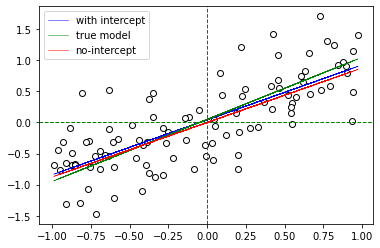

In [136]:
plt.scatter(X, y, color='white', edgecolor='black', marker='o')

plt.axhline(0, color='green', linewidth=1, linestyle='--')
plt.axvline(0, color='green', linewidth=1, linestyle='--')


plt.plot(X, beta_1_hat * X + beta_0_hat, color='blue', linewidth=0.5, label='with intercept')
plt.plot(X, beta * X + beta_0, color='green', linewidth=0.5, label='true model')
plt.plot(X, beta_hat * X, color='red', linewidth=0.5, label='no-intercept')

plt.legend()

Zoom a little bit...

(-0.5, 0.5)

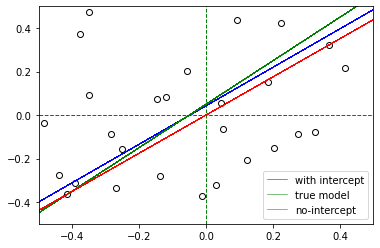

In [137]:
plt.scatter(X, y, color='white', edgecolor='black', marker='o')

plt.axhline(0, color='green', linewidth=1, linestyle='--')
plt.axvline(0, color='green', linewidth=1, linestyle='--')

plt.plot(X, beta_1_hat * X + beta_0_hat, color='blue', linewidth=0.5, label='with intercept')
plt.plot(X, beta * X + beta_0, color='green', linewidth=0.5, label='true model')
plt.plot(X, beta_hat * X, color='red', linewidth=0.5, label='no-intercept')

plt.legend()

plt.xlim(-0.5, 0.5) 
plt.ylim(-0.5, 0.5)  


Let's compare sum of squares of differences between fitted response values and true response values of two models and call the value $SS_{dev}$, or sum of square deviations (from true model), or $SSD$.
($SS_{dev} = \sum (y_i-\hat{y_i})^2$)

In [138]:
y_hat = beta_1_hat * X + beta_0_hat  # intercept model response variable
y_hat_hat = beta_hat * X  # no-intercept response variable


y = beta * X + beta_0

SS_dev_intercept = np.sum((y-y_hat)**2)
SS_dev_no_intercept = np.sum((y-y_hat_hat)**2)

print(f"SSD of intercept model: {SS_dev_intercept}")
print(f"SSD of no-intercept model: {SS_dev_no_intercept}")

SSD of intercept model: 0.46305539852212707
SSD of no-intercept model: 0.705129691181008


### Same calculations but many times

In [139]:
SS_dev_intercept_mean = 0
SS_dev_no_intercept_mean = 0


SSD_sum = 0  # counts how many times no intercept model was better in terms of SSD
BIC_sum = 0

num_samples = 1000
X = np.random.rand(num_samples) * 2 - 1

for i in range(100):

    beta =  1  # true slope
    beta_0 = 0.00005
    sigma = 1
    noise = np.random.normal(0, sigma, num_samples)  # standard normal noise term

    y = beta * X + noise + beta_0

    mean_x = np.average(X)
    mean_y = np.average(y)

    Sxx = np.sum((X-mean_x)**2)
    Sxy = np.sum((X-mean_x)*y)


    beta_1_hat = Sxy/Sxx
    beta_0_hat = mean_y - beta_1_hat * mean_x

    beta_hat = np.sum(X*y)/np.sum(X**2)


    y_hat = linear_regression(X, y)  # intercept model response variable
    y_hat_hat = linear_regression(X, y, intercept=False)  # no-intercept response variable
    
    BIC_no = bayesian_information_criterion(y, y_hat_hat, num_samples, sigma, k=2)
    BIC = bayesian_information_criterion(y, y_hat, num_samples, sigma, k=3)
    
    if BIC_no < BIC:
        BIC_sum += 1

    y_true = beta * X + beta_0

    SS_dev_intercept = np.sum((y_true-y_hat)**2)
    SS_dev_no_intercept = np.sum((y_true-y_hat_hat)**2)

    
    if SS_dev_no_intercept < SS_dev_intercept:
        SSD_sum += 1
        
    
    SS_dev_intercept_mean += SS_dev_intercept
    SS_dev_no_intercept_mean += SS_dev_no_intercept
    
print(num_samples*(beta_0**2)-(beta_0**2)*(num_samples**2)*(mean_x**2)/np.sum(X**2)+1+np.sum(X**2)*(beta-beta**2))
print((np.sum(X**2)/ num_samples+np.sum(X**2)-2*num_samples*mean_x**2)/np.sum((X-mean_x)**2))
print(SS_dev_intercept_mean/10000)
print(SS_dev_no_intercept_mean/10000)
print(f"{SSD_sum}")
print(f"{BIC_sum}")

1.000002499747142
1.0008989476847967
6978.722110196805
6968.7273745302755
83
95


#### Find interesting values for variance and intercept term

Find values for variance and intercept term, when BIC and SSD will be equal in two models.

It is hard to check the exact equality since we have to account for randomness of data, but we can get close enough by making a lot of simulations and then taking the average of the statistics that we want to estimate, in our case SSD and BIC

In [142]:
delta_SSD = np.zeros(1000)
alphas = np.zeros(1000)

np.random.seed(42)

for increment in range(1000):
    SS_dev_intercept_mean = 0
    SS_dev_no_intercept_mean = 0
    num_samples = 100 
    for i in range(100):

        beta =  1  # true slope
        beta_0 = 0 + increment/5000
        noise = np.random.normal(0, 1, num_samples)  # standard normal noise term
        X = np.random.rand(num_samples) * 2 - 1
        y = beta * X + noise + beta_0

        mean_x = np.average(X)
        mean_y = np.average(y)

        Sxx = np.sum((X-mean_x)**2)
        Sxy = np.sum((X-mean_x)*(y))


        beta_1_hat = Sxy/Sxx
        beta_0_hat = mean_y - beta_1_hat * mean_x

        beta_hat = np.sum(X*y)/np.sum(X**2)

        # y_hat = linear_regression(X, y)
        # y_hat_hat = linear_regression(X,y, False)

        y_hat = beta_1_hat * X + beta_0_hat  # intercept model response variable
        y_hat_hat = beta_hat * X  # no-intercept response variable

        y_true = beta * X + beta_0

        SS_dev_intercept = np.sum((y_true-y_hat)**2)
        SS_dev_no_intercept = np.sum((y_true-y_hat_hat)**2)

        SS_dev_intercept_mean += SS_dev_intercept
        SS_dev_no_intercept_mean += SS_dev_no_intercept

    SS_dev_intercept_mean /= 100
    SS_dev_no_intercept_mean /= 100

    delta_SSD[increment] = SS_dev_no_intercept_mean - SS_dev_intercept_mean
    alphas[increment] = beta_0

zeros = np.zeros_like(alphas)

plt.plot(alphas, zeros, '--', linewidth=0.5)
plt.plot(alphas, delta_SSD, color='black', linewidth=0.5)

plt.xlabel(r"$\beta_0$")
plt.ylabel(r"$\Delta SSD$")
plt.show()


SyntaxError: invalid syntax (2479352963.py, line 25)

While as $\alpha$ grows we clearly see that the full model becomes better fit, however at a very small values of $\alpha$ no-intercept model performs better on average

In [141]:
delta_SSD

array([-8.59053758e-01, -1.05510966e+00, -7.47943525e-01, -1.04850132e+00,
       -1.47634059e+00, -8.71365630e-01, -1.02204353e+00, -1.02110124e+00,
       -9.73428008e-01, -8.25172628e-01, -1.02791640e+00, -9.84010712e-01,
       -1.03250955e+00, -1.05036111e+00, -9.45910520e-01, -1.29378473e+00,
       -9.41349894e-01, -9.63083750e-01, -8.88876493e-01, -8.19314806e-01,
       -1.04954098e+00, -1.14035103e+00, -8.85048487e-01, -1.03327753e+00,
       -1.00272651e+00, -1.01283705e+00, -1.02997904e+00, -1.02157933e+00,
       -9.15204451e-01, -9.55467535e-01, -1.06288362e+00, -1.09307929e+00,
       -1.06045859e+00, -8.09225514e-01, -1.00374849e+00, -1.02663196e+00,
       -9.04381235e-01, -8.71833836e-01, -8.52287183e-01, -8.88677081e-01,
       -9.07297576e-01, -1.38898614e+00, -1.01805140e+00, -1.06898848e+00,
       -7.82061714e-01, -8.54561062e-01, -1.05177360e+00, -1.12738569e+00,
       -8.67550812e-01, -1.17078049e+00, -8.66268975e-01, -1.17297481e+00,
       -1.09674291e+00, -